# Charting 2

In [9]:

import yfinance as yf
import pandas as pd
symbol = 'HSCL.NS'
df = yf.download(symbol, start='2023-10-01')

[*********************100%%**********************]  1 of 1 completed


## OHLC Chart

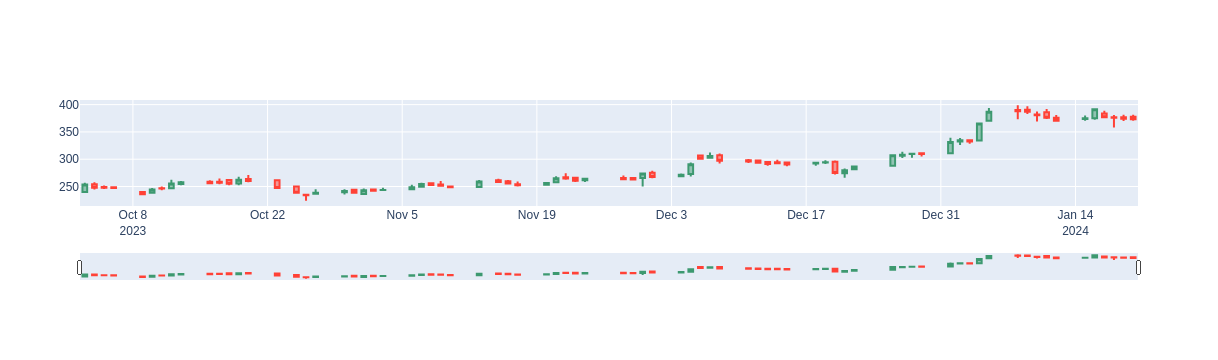

In [11]:
import plotly.graph_objects as go
fig = go.Figure(go.Candlestick(x=df.index,
  open=df['Open'],
  high=df['High'],
  low=df['Low'],
  close=df['Close']))
fig.show()

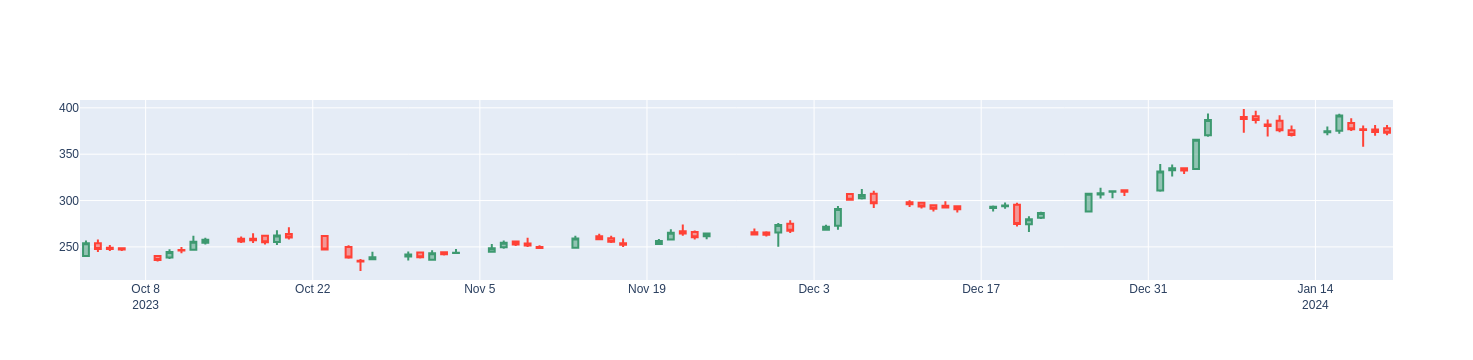

In [12]:
# removing rangeslider
fig.update_layout(xaxis_rangeslider_visible=False)

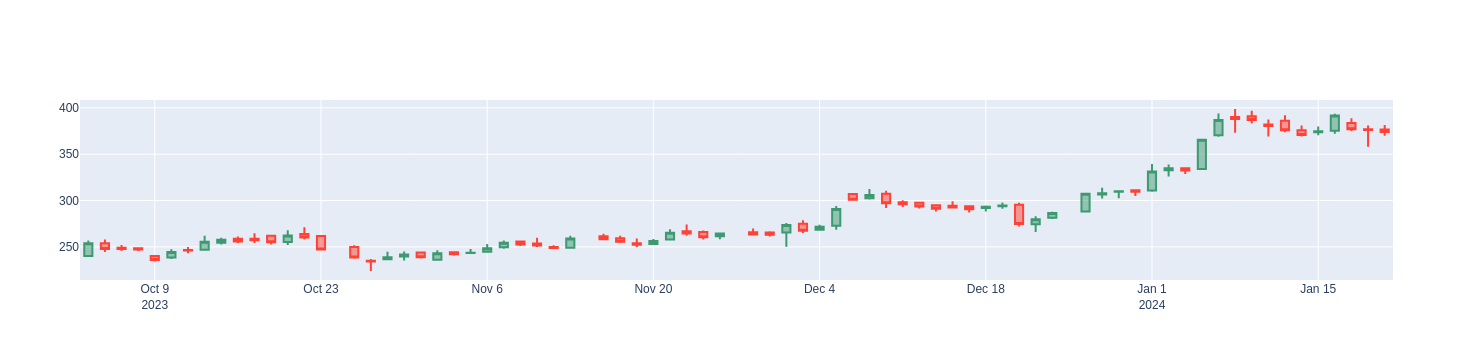

In [13]:
# hide weekends
fig.update_xaxes(rangebreaks=[dict(bounds=["sat", "mon"])])

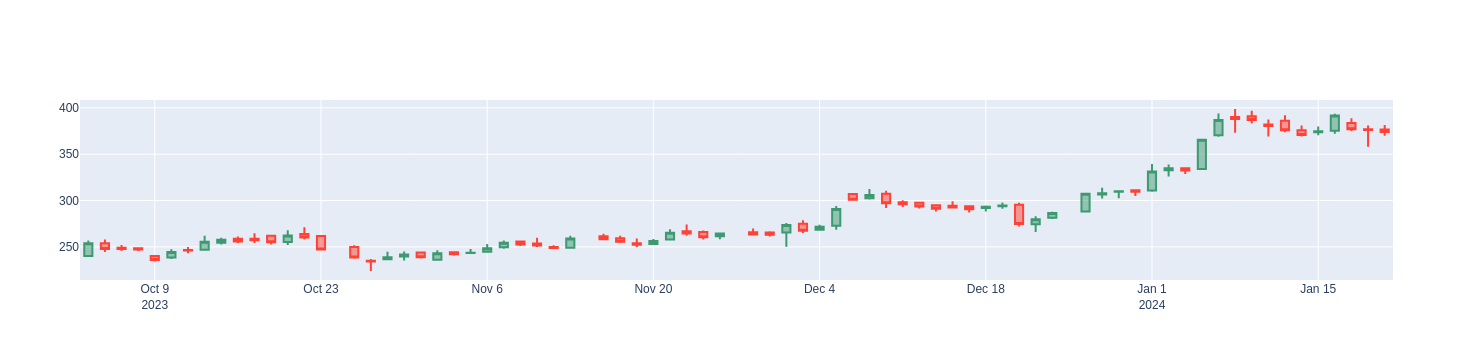

In [14]:
# removing all empty dates
# build complete timeline from start date to end date
dt_all = pd.date_range(start=df.index[0],end=df.index[-1])

# retrieve the dates that ARE in the original datset
dt_obs = [d.strftime("%Y-%m-%d") for d in pd.to_datetime(df.index)]

# define dates with missing values
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]

fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])


# Add Moving Averages & Volume

In [15]:
# add moving averages to df
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA5'] = df['Close'].rolling(window=5).mean()

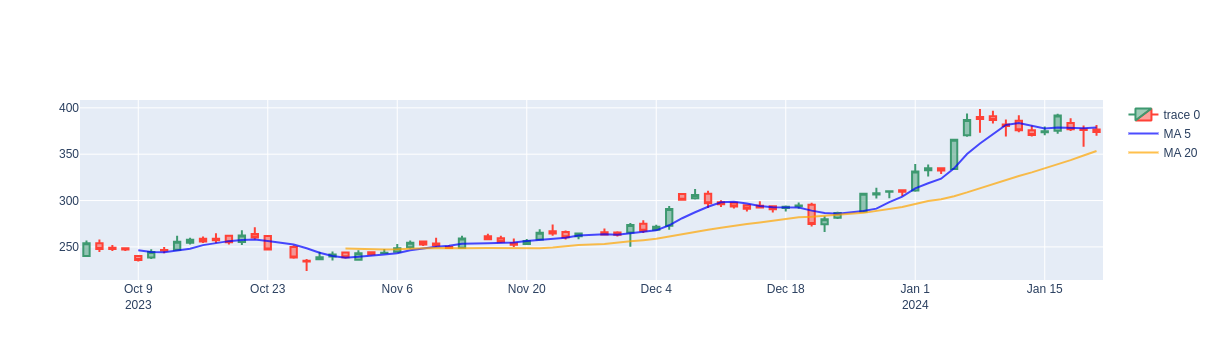

In [16]:
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA5'], 
                         opacity=0.7, 
                         line=dict(color='blue', width=2), 
                         name='MA 5'))
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA20'], 
                         opacity=0.7, 
                         line=dict(color='orange', width=2), 
                         name='MA 20'))

In [18]:
def MACD(self, name,  bars: list):
        """
        Return MACD for given time series. Bars list must be 26 bars
        in length (last 26 bars for period).

        MACD = EMA(12) - EMA(26)

        Note we only use the MACD, not signal or histogram.
        """

        self.check_bars_type(bars)

        macd, signal, hist = ta.MACD(
            bars['close'], fastperiod=12, slowperiod=26, signalperiod=9)

        return macd 